In [144]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import os
import sys
import pickle
import seaborn as sns

from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [7]:
#ROOT_DIR = "/home/charles/Projects/QcMtlStreets"
ROOT_DIR = "/home/dhw3172/projects/qcMtlStreets"
sys.path.append(os.path.join(ROOT_DIR, "Python"))   
os.chdir(ROOT_DIR)

In [8]:
from googleApiKey import *

In [102]:
filePathPickle=os.path.join(ROOT_DIR,"Data","Pickle", "graphElevationQc.pickle")
if os.path.isfile(filePathPickle):
    print("File exists => reading graph")
    pickle_inQc = open(filePathPickle,"rb")
    graphQcWithElevation = pickle.load(pickle_inQc)
else:
    print("File does not exists => calling google api")


File exists => reading graph


In [103]:
filePathPickleMtl=os.path.join(ROOT_DIR,"Data","Pickle", "graphElevationMtl.pickle")
if os.path.isfile(filePathPickleMtl):
    print("File exists => reading graph")
    pickle_inMtl = open(filePathPickleMtl,"rb")
    graphMtlWithElevation = pickle.load(pickle_inMtl)
else:
    print("File does not exists => calling google api")
    graphMtlWithElevation=ox.add_node_elevations(graphMtl, api_key=googleKey)
    pickle_out = open(filePathPickleMtl,"wb")
    pickle.dump(graphMtlWithElevation, pickle_out)
    pickle_out.close()

File exists => reading graph


In [104]:
qcElev = [data["elevation"] for node, data in graphQcWithElevation.nodes(data=True)]
mtlElev = [data["elevation"] for node, data in graphMtlWithElevation.nodes(data=True)]

In [105]:
allElev=qcElev+mtlElev

In [106]:
numQuantiles=20

In [107]:
#Tests with qcut 

In [108]:
quantList = pd.qcut(x=allElev, q=numQuantiles, labels=range(numQuantiles))
print(type(quantList))
print(allElev[0], quantList[0])
quantList

<class 'pandas.core.arrays.categorical.Categorical'>
78.863 14


[14, 10, 14, 14, 14, ..., 7, 8, 8, 8, 7]
Length: 220730
Categories (20, int64): [0 < 1 < 2 < 3 ... 16 < 17 < 18 < 19]

In [109]:
print( len(np.power(np.linspace(1,numQuantiles,numQuantiles),3)), numQuantiles )

20 20


In [110]:
ser, bins = pd.qcut(x=allElev, q=numQuantiles, labels=np.power(np.linspace(1,numQuantiles,numQuantiles),3), retbins=True)
bins

array([-31.611  ,   8.931  ,  13.6869 ,  15.85035,  18.568  ,  21.73425,
        24.754  ,  27.95015,  31.645  ,  34.546  ,  38.39   ,  43.44695,
        48.388  ,  55.80885,  66.841  ,  79.356  ,  97.1082 , 127.7716 ,
       162.6992 , 204.5825 , 579.726  ])

In [111]:
print(ser[0],quantList[0]) #the labels has an important effect on the values returned and how we will use them
set(ser)

3375.0 14


{1.0,
 8.0,
 27.0,
 64.0,
 125.0,
 216.0,
 343.0,
 512.0,
 729.0,
 1000.0,
 1331.0,
 1728.0,
 2197.0,
 2744.0,
 3375.0,
 4096.0,
 4913.0,
 5832.0,
 6859.0,
 8000.0}

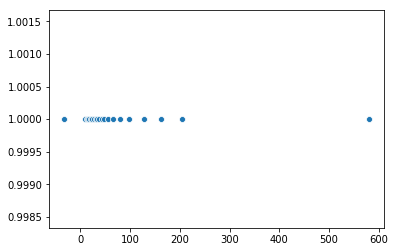

In [112]:
sns.scatterplot(x=bins,
                y=[1] * len(bins))

In [113]:
import matplotlib

#start=np.min(allElev)
#stop=np.max(allElev)
#colors = [cm.get_cmap("plasma")(x) for x in np.linspace(start, stop, numQuantiles)]  #fuck it, always use a normalization if possible to avoid weird results
#colors = [cm.get_cmap("plasma")(x) for x in np.linspace(0, numQuantiles-1, numQuantiles)] # even with a start and stop, we need some normalization

cNorm  = matplotlib.colors.Normalize(vmin=0, vmax=numQuantiles)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.plasma)
colors = [ scalarMap.to_rgba(i) for i in range(numQuantiles)]
 

In [114]:
np.linspace(start, stop, numQuantiles) #array of size numQuantiles (e.g. 20) with values running from start to stop

array([ -2.271     ,  28.36042105,  58.99184211,  89.62326316,
       120.25468421, 150.88610526, 181.51752632, 212.14894737,
       242.78036842, 273.41178947, 304.04321053, 334.67463158,
       365.30605263, 395.93747368, 426.56889474, 457.20031579,
       487.83173684, 518.46315789, 549.09457895, 579.726     ])

In [115]:
print(type(colors))
colors[0]

<class 'list'>


(0.050383, 0.029803, 0.527975, 1.0)

In [116]:
print(type(quantList))
quantList.to_list()[:3]


<class 'pandas.core.arrays.categorical.Categorical'>


[14, 10, 14]

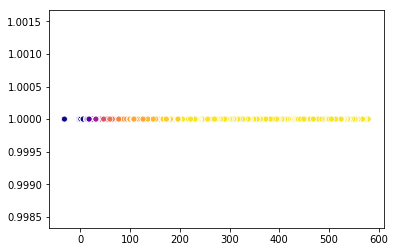

In [117]:
sns.scatterplot( x=allElev,
                y=[1] * len(allElev),
                hue=quantList.to_list(),
                palette={i: colors[i] for i in range(len(colors))},
                legend=False)

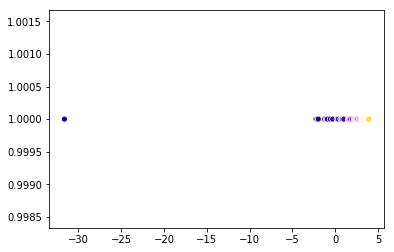

In [118]:
sortedSubsetElev=np.sort(allElev)[:100]
quantListSubset= pd.qcut(sortedSubsetElev,q=numQuantiles,labels=range(numQuantiles))
sns.scatterplot( x=sortedSubsetElev,
                y=[1] * len(sortedSubsetElev),
                hue=quantListSubset,  #don't think that to_list makes a difference
                palette={i: colors[i] for i in range(len(colors))},
                legend=False)

In [119]:
{i: colors[i] for i in range(len(colors))}

{0: (0.050383, 0.029803, 0.527975, 1.0),
 1: (0.16407, 0.020171, 0.577478, 1.0),
 2: (0.254627, 0.013882, 0.615419, 1.0),
 3: (0.337683, 0.005618, 0.643049, 1.0),
 4: (0.417642, 0.000564, 0.65839, 1.0),
 5: (0.494877, 0.01199, 0.657865, 1.0),
 6: (0.562738, 0.051545, 0.641509, 1.0),
 7: (0.631017, 0.107699, 0.608287, 1.0),
 8: (0.69284, 0.165141, 0.564522, 1.0),
 9: (0.748289, 0.222711, 0.516834, 1.0),
 10: (0.798216, 0.280197, 0.469538, 1.0),
 11: (0.840155, 0.33358, 0.427455, 1.0),
 12: (0.881443, 0.392529, 0.383229, 1.0),
 13: (0.918109, 0.453603, 0.339529, 1.0),
 14: (0.949217, 0.517763, 0.295662, 1.0),
 15: (0.973416, 0.585761, 0.25154, 1.0),
 16: (0.98826, 0.652325, 0.211364, 1.0),
 17: (0.994553, 0.728728, 0.171622, 1.0),
 18: (0.988648, 0.809579, 0.145357, 1.0),
 19: (0.968443, 0.894564, 0.147014, 1.0)}

In [120]:
bins

array([-31.611  ,   8.931  ,  13.6869 ,  15.85035,  18.568  ,  21.73425,
        24.754  ,  27.95015,  31.645  ,  34.546  ,  38.39   ,  43.44695,
        48.388  ,  55.80885,  66.841  ,  79.356  ,  97.1082 , 127.7716 ,
       162.6992 , 204.5825 , 579.726  ])

In [121]:
import bisect
bisect.bisect_left(bins, -2.99  )

1

In [122]:
def getColorFromElev(bins,elev):
    try:
        idx=bisect.bisect_left(bins, elev)  #watch out with the indexing, bisect.bisect_left(bins, elev) returns values in [1,20] 
        c=colors[idx-1]
    except Exception as e:
        print("Fatal error at elevation ", elev, " idx ", idx)
        
    return(c)

In [123]:
listQcColors=[  getColorFromElev(bins, data["elevation"]) for n,data in graphQcWithElevation.nodes(data=True) ]
listMtlColors=[ getColorFromElev(bins, data["elevation"]) for n,data in graphMtlWithElevation.nodes(data=True) ]

In [124]:
listQcColors[:2] 

[(0.949217, 0.517763, 0.295662, 1.0), (0.798216, 0.280197, 0.469538, 1.0)]

In [125]:
[data["elevation"] for n,data in graphQcWithElevation.nodes(data=True) ][:2]

[78.863, 38.864]

In [126]:
listMtlColors[:2]

[(0.748289, 0.222711, 0.516834, 1.0), (0.494877, 0.01199, 0.657865, 1.0)]

In [127]:
[data["elevation"] for n,data in graphMtlWithElevation.nodes(data=True) ][:2]

[35.697, 23.767]

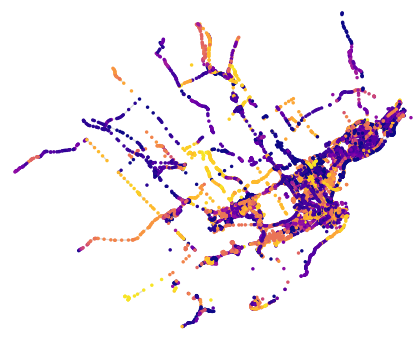

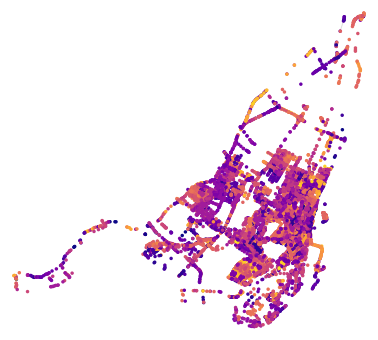

In [141]:
#Test
subsetSize=1000
fig, ax = ox.plot_graph( ox.utils.induce_subgraph(graphQcWithElevation, [node for node,data in graphQcWithElevation.nodes(data=True)][:subsetSize]) , 
                        fig_height=6, 
                        node_color=listQcColors[:subsetSize], 
                        node_size=12, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                        close=False,
                        show=False
                       )

fig, ax = ox.plot_graph(ox.utils.induce_subgraph(graphMtlWithElevation, [node for node,data in graphMtlWithElevation.nodes(data=True)][:subsetSize]) , 
                        fig_height=6, 
                        node_color=listMtlColors[:subsetSize], 
                        node_size=12, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                        close=False,
                        show=False
                       )

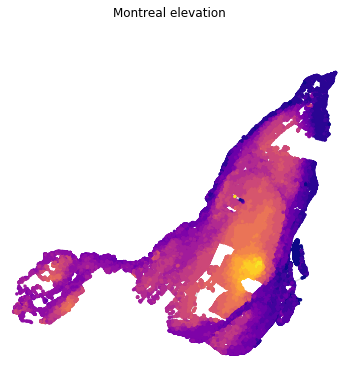

In [160]:
fig, ax = ox.plot_graph(graphMtlWithElevation , 
                        fig_height=6, 
                        fig_width=6,
                        node_color=listMtlColors, 
                        node_size=12, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                        close=False,
                        show=False
                       )
fig.suptitle("Montreal elevation")



fig.savefig(os.path.join(ROOT_DIR,"Figures","MtlElevationMapsBothV2.png"))

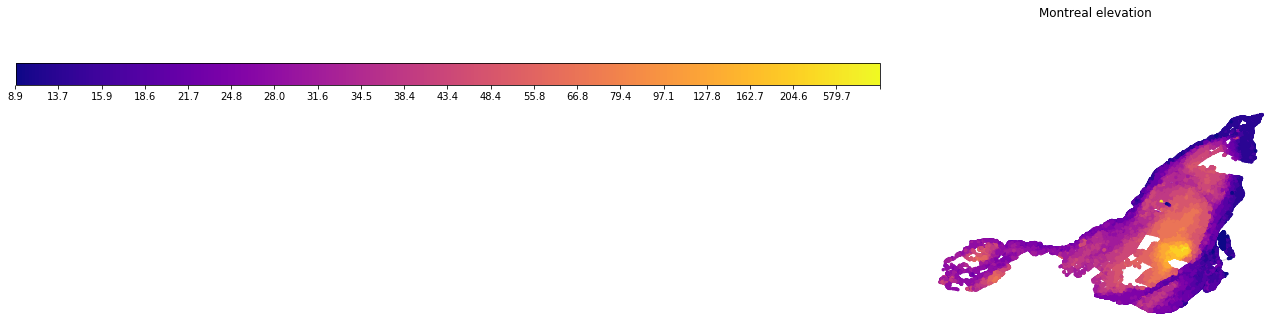

In [176]:
fig, ax = ox.plot_graph(graphMtlWithElevation , 
                        fig_height=6, 
                        fig_width=6,
                        node_color=listMtlColors, 
                        node_size=12, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                        close=False,
                        show=False
                       )
fig.suptitle("Montreal elevation")

cax = fig.add_axes([-2, 0.8, 2, 0.05])
im = ax.imshow(listMtlColors+listQcColors, cmap='plasma')
figBar=fig.colorbar(im,
                    cax=cax, 
                    orientation='horizontal') 

tick_locator = ticker.MaxNLocator(nbins=numQuantiles)
figBar.locator = tick_locator
figBar.update_ticks()

figBar.ax.set_xticklabels(np.percentile(allElev,[(i+1)*5 for i in range(numQuantiles)]).round(1)) 
ax.xaxis.set_major_formatter(plt.NullFormatter())

fig.savefig(os.path.join(ROOT_DIR,"Figures","MtlElevationMapsBothWithColBarV2.png"))


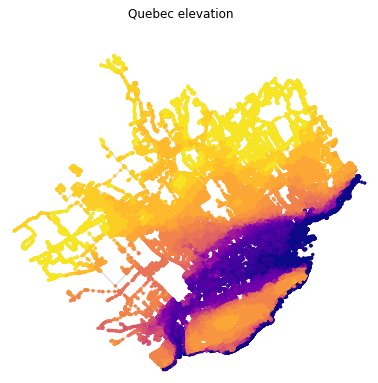

In [154]:
 

fig, ax = ox.plot_graph(graphQcWithElevation, 
                        fig_height=6, 
                        node_color=listQcColors, 
                        node_size=12, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                        close=False,
                        show=False
                       )

fig.suptitle("Quebec elevation")


fig = ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","QcElevationMapsBothV2.png"))

In [147]:
np.percentile(allElev,[(i+1)*5 for i in range(numQuantiles)]).round(0)

array([  9.,  14.,  16.,  19.,  22.,  25.,  28.,  32.,  35.,  38.,  43.,
        48.,  56.,  67.,  79.,  97., 128., 163., 205., 580.])